In [18]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple

LangRes = namedtuple("lang_res", ["name", "trans", "ours_wo_tune", "ours_w_tune", "distance"])

In [49]:
plt.tight_layout()
def plot_line(obj_dict, xticklabel, x=None, fname='', ylabel = '', legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(20, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=20)

    for i, key in enumerate(obj_dict):
        name = key
        if x is None:
            x_axis = range(len(obj_dict[key]))
        else:
            x_axis = x
        axes.plot(x_axis, 
                  obj_dict[key], 
                  label=name, **line_opt,
                  marker=marker_list[i]) 
#     axes.legend(loc='upper right', prop={'size': 20})
    axes.legend(prop={'size': 20})
    axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=25)
    
    axes.set_xticks(range(len(xticklabel)))
    axes.set_xticklabels(xticklabel)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [70]:
dist_map = {}
with open("../statistics/distance_all.txt", "r") as fin:
    _ = fin.readline()
    for line in fin:
        line_s = line.split("\t")
        dist_map[line_s[0]] = sum(float(line_s[x]) for x in range(2, 7))

In [71]:

data = []
with open("../cross-lingual-flow-method-parsing.csv", "r") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            lang_res = LangRes(row[0].split("/")[-1], float(row[1]), float(row[3]), float(row[4]), dist_map[row[0]])
            data.append(lang_res)
        except:
            continue

In [36]:
data

[lang_res(name='en', trans=91.82, ours_wo_tune=67.8, ours_w_tune=67.8, distance=0.0),
 lang_res(name='ar', trans=38.12, ours_wo_tune=32.14, ours_w_tune=55.44, distance=1.0),
 lang_res(name='bg', trans=79.4, ours_wo_tune=73.52, ours_w_tune=72.96, distance=0.109),
 lang_res(name='ca', trans=73.83, ours_wo_tune=64.7, ours_w_tune=62.72, distance=0.064),
 lang_res(name='hr', trans=61.91, ours_wo_tune=59.57, ours_w_tune=65.31, distance=0.078),
 lang_res(name='da', trans=76.64, ours_wo_tune=61.64, ours_w_tune=62.38, distance=0.035),
 lang_res(name='nl', trans=68.55, ours_wo_tune=61.59, ours_w_tune=52.38, distance=0.021),
 lang_res(name='et', trans=65.72, ours_wo_tune=55.85, ours_w_tune=51.24, distance=0.081),
 lang_res(name='fi', trans=66.27, ours_wo_tune=55.39, ours_w_tune=50.48, distance=0.099),
 lang_res(name='fr', trans=77.87, ours_wo_tune=65.92, ours_w_tune=61.59, distance=0.03),
 lang_res(name='de', trans=71.34, ours_wo_tune=70.1, ours_w_tune=61.75, distance=0.053),
 lang_res(name='he',

In [78]:
plot_data = {}
data_s = sorted(data, key=lambda s: s.distance)
# plot_data["TransformerGraph"] = [x.trans for x in data_s]
# # plot_data["Ours w/o tuning"] = [x.ours_wo_tune for x in data_s]
# plot_data["Ours w/ tuning"] = [x.ours_w_tune for x in data_s]
plot_data["difference"] = [x.trans - x.ours_w_tune for x in data_s]
xtick_labels = [x.name for x in data_s]
distances = [x.distance for x in data_s]

In [68]:
len(distances)

25

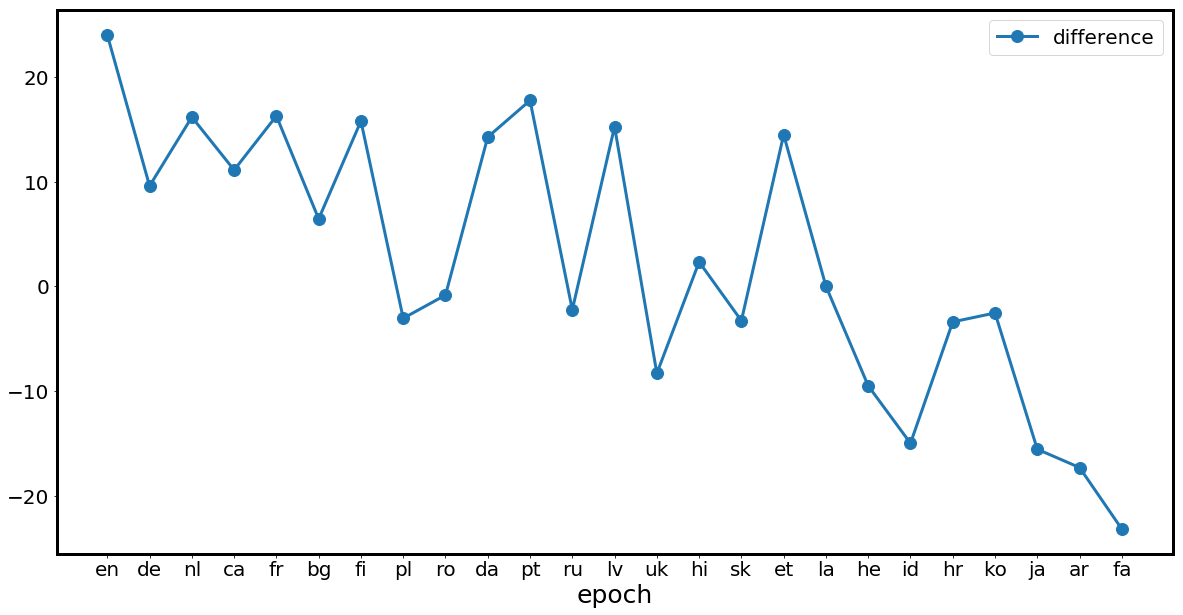

In [79]:
plot_line(plot_data, xtick_labels)